<a href="https://colab.research.google.com/github/PRAKASHMS7/Phishing-Detection-By-Using-ML-Models/blob/main/Embedded_Based_Approach/RANDOM_FOREST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.9759
Precision: 0.9761
Recall: 0.9759
F1 Score: 0.9759
AUC Score: 0.9990


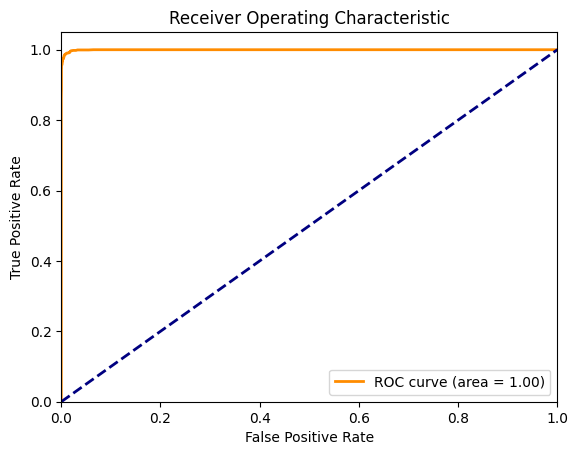

Top 40 Important Features:
SymbolCount_Domain             0.028255
NumberofDotsinURL              0.027269
ArgUrlRatio                    0.026875
domain_token_count             0.026092
avgdomaintokenlen              0.025385
domainlength                   0.024663
urlLen                         0.024126
host_letter_count              0.023488
Entropy_Domain                 0.023451
tld                            0.021060
CharacterContinuityRate        0.021037
argDomanRatio                  0.020417
pathurlRatio                   0.020172
Directory_LetterCount          0.020131
Domain_LongestWordLength       0.019582
NumberRate_URL                 0.019174
domainUrlRatio                 0.019013
longdomaintokenlen             0.018792
avgpathtokenlen                0.018458
pathDomainRatio                0.018298
subDirLen                      0.018068
Entropy_DirectoryName          0.017753
SymbolCount_Extension          0.017628
NumberRate_FileName            0.016533
spcharUrl    

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
data = pd.read_csv('/content/All.csv')

# Separate features and target variable
X = data.drop('URL_Type_obf_Type', axis=1)  # Replace 'URL_Type_obf_Type' with your actual target column name
y = data['URL_Type_obf_Type']  # Replace with the actual target column name

# Convert target variable to numerical labels if necessary
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Handle missing, infinity, or large values
X = X.replace([float('inf'), float('-inf')], float('nan'))  # Replace infinities with NaN
X = X.fillna(X.mean())  # Fill NaN with column mean (you can use median or mode as well)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)

# Extract the 40 most important features
important_features = importances.sort_values(ascending=False).head(40)

# Map the important features to their respective indices
important_feature_names = important_features.index
important_feature_indices = [list(X.columns).index(name) for name in important_feature_names]

# Select important features for modeling
X_selected_train = X_train[:, important_feature_indices]
X_selected_test = X_test[:, important_feature_indices]

# Train a new Random Forest model with selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_selected_train, y_train)

# Make predictions
y_pred = rf_selected.predict(X_selected_test)
y_prob = rf_selected.predict_proba(X_selected_test)[:, 1]  # For ROC curve, we need probability estimates for class 1

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# AUC requires probability scores for only one class
auc_score = roc_auc_score(y_test, rf_selected.predict_proba(X_selected_test), multi_class='ovr', average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {auc_score:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=rf_selected.classes_[1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print the 40 most important features
print("Top 40 Important Features:")
print(important_features)


In [ ]:
a, b = 5, 10
a = a + b
b= a - b
a = a - b
print(a, b)


20 -5


In [ ]:
a, b = 56, 98
while b:
    a, b = b, a % b
print(a)


14
